<a href="https://colab.research.google.com/github/DiegoRInacio/Analises_Geoespaciais/blob/main/Geopandas_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Como carregar dados da WEB com realação a segurança publica do Estado do Rio de Janeiro.

Iremos realizar o donwload dos dados referente ao site do Ministério Publico do Estado do Rio de Janeiro - MPRJ 
Link: [http://apps.mprj.mp.br/sistema/inloco/](https://)

Esses dados foram baixados no formato "xls" mas, o site do MPRJ já disponibiliza em formato shp, porém nosso objetivo é instruir o usuário a realizar a transformação de xls para shp quando não houver essa opção.
***

Vamos carregar os dados no formato excel para isso vamos instalar a biblioteca "xlrd".

In [ ]:
#instalando a biblioteca openpyxl
#para usar no conda
#!conda install -c anaconda openpyxl -y

#instalando a biblioteca openpyxl com o pip
!pip install openpyxl

#instalando a biblioteca GeoPandas
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 43.7 MB/s 
     |████████████████████████████████| 16.7 MB 30.8 MB/s 


In [ ]:
#importação de bibliotecas
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from shapely import geometry
import matplotlib.pyplot as plt

<h2> Usar a função <strong>read_excel</strong> para ler os arquivos baixados:</h2>

In [ ]:
#lendo os dados com pandas
filename ='/content/drive/MyDrive/Diego Faculdade/Estudos sobre DataSciense/Tabelas/colaborativo_ott.xlsx'

ocorrencias = pd.read_excel(filename)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
#mostrar os dados  com a função head
ocorrencias.head(5)

,FID,id,comunicacao,data_comunicacao,dia,mes,dia_semana,hora,descricao,localidade,municipio,latitude,longitude,end_google,geom
0,colaborativo_ott.fid-34ed7f7f_17f363a751c_60ac,1.0,Manifestação,16/02/2018,16,2,Sexta-feira,14:08,manifestação na padre telêmaco em cascadura. a...,"padre telemaco, cascadura - rj",Rio de Janeiro,-22.885232,-43.331949,"R. Padre Telêmaco - Cascadura, Rio de Janeiro ...",POINT (-43.3319492 -22.88523190000002)
1,colaborativo_ott.fid-34ed7f7f_17f363a751c_60ad,2.0,Manifestação,16/02/2018,16,2,Sexta-feira,14:08,manifestação na padre telêmaco em cascadura. a...,"padre telemaco, cascadura - rj",Rio de Janeiro,-22.885232,-43.331949,"R. Padre Telêmaco - Cascadura, Rio de Janeiro ...",POINT (-43.3319492 -22.88523190000002)
2,colaborativo_ott.fid-34ed7f7f_17f363a751c_60ae,3.0,Manifestação,16/02/2018,16,2,Sexta-feira,15:07,"protesto na marechal rondon, próximo ao acesso...","marechal rondon, mangueira - rj",Rio de Janeiro,-22.906293,-43.240714,"Av. Mal. Rondon - Mangueira, Rio de Janeiro - ...",POINT (-43.2407141 -22.906293400000017)
3,colaborativo_ott.fid-34ed7f7f_17f363a751c_60af,4.0,Manifestação,16/02/2018,16,2,Sexta-feira,15:07,"protesto na marechal rondon, próximo ao acesso...","marechal rondon, mangueira - rj",Rio de Janeiro,-22.906293,-43.240714,"Av. Mal. Rondon - Mangueira, Rio de Janeiro - ...",POINT (-43.2407141 -22.906293400000017)
4,colaborativo_ott.fid-34ed7f7f_17f363a751c_60b0,5.0,Manifestação,16/02/2018,16,2,Sexta-feira,15:46,"protesto na estrada do magarça, entrada do bai...","estrada do magarça, maravilha, campo grande - rj",Rio de Janeiro,-22.942860,-43.592368,"Estr. do Magarça - Campo Grande, Rio de Janeir...",POINT (-43.592368000000015 -22.94286000000001)


In [ ]:
#apresentar todas as colunas para ver se temos informações de latitude e longitude
ocorrencias.columns

Index(['FID', 'id', 'comunicacao', 'data_comunicacao', 'dia', 'mes',
       'dia_semana', 'hora', 'descricao', 'localidade', 'municipio',
       'latitude', 'longitude', 'end_google', 'geom'],
      dtype='object')

In [ ]:
#mostrar os dados faltantes caso esses existam

print('Sendo assim podemo dizer que no nosso df a unica coluna que possuí dado faltante é a de localidade o que não afeta\n'
      'no objetivo que é tranaformar as colunas "latitude e longtude" em pontos plotados. \n\nSoma dos dados faltantes no nosso DF\n',
      ocorrencias.isnull().sum())

Sendo assim podemo dizer que no nosso df a unica coluna que possuí dado faltante é a de localidade o que não afeta
no objetivo que é tranaformar as colunas "latitude e longtude" em pontos plotados. 

Soma dos dados faltantes no nosso DF
 FID                 0
id                  0
comunicacao         0
data_comunicacao    0
dia                 0
mes                 0
dia_semana          0
hora                0
descricao           0
localidade          1
municipio           0
latitude            0
longitude           0
end_google          0
geom                0
dtype: int64


In [ ]:
ocorrencias[['latitude', 'longitude', 'geom']]

,latitude,longitude,geom
0,-22.885232,-43.331949,POINT (-43.3319492 -22.88523190000002)
1,-22.885232,-43.331949,POINT (-43.3319492 -22.88523190000002)
2,-22.906293,-43.240714,POINT (-43.2407141 -22.906293400000017)
3,-22.906293,-43.240714,POINT (-43.2407141 -22.906293400000017)
4,-22.942860,-43.592368,POINT (-43.592368000000015 -22.94286000000001)
...,...,...,...
11038,-23.223483,-44.716039,POINT (-44.716039 -23.223483000000012)
11039,-22.760851,-43.404251,POINT (-43.4042512 -22.76085120000001)
11040,-22.830185,-43.293311,POINT (-43.293311 -22.830185)
11041,-22.864167,-43.323889,POINT (-43.32388890000001 -22.864166699999995)


<h2>Como podemos notar na célular anterior nossa tabela já veio com a coluna <strong>geom</strong> que é a coluna de <strong>geometria</strong> para inserção no GeoPandas por isso realizamos um drop nesse coluna e criamos uma outra variavel que é "ocorrencias2" sem a coluna geom.

In [ ]:
ocorrencias2 = ocorrencias.drop('geom', axis = 1)

In [ ]:
#Nosso DF sem a coluna geom
ocorrencias2.head(5)

,FID,id,comunicacao,data_comunicacao,dia,mes,dia_semana,hora,descricao,localidade,municipio,latitude,longitude,end_google
0,colaborativo_ott.fid-34ed7f7f_17f363a751c_60ac,1.0,Manifestação,16/02/2018,16,2,Sexta-feira,14:08,manifestação na padre telêmaco em cascadura. a...,"padre telemaco, cascadura - rj",Rio de Janeiro,-22.885232,-43.331949,"R. Padre Telêmaco - Cascadura, Rio de Janeiro ..."
1,colaborativo_ott.fid-34ed7f7f_17f363a751c_60ad,2.0,Manifestação,16/02/2018,16,2,Sexta-feira,14:08,manifestação na padre telêmaco em cascadura. a...,"padre telemaco, cascadura - rj",Rio de Janeiro,-22.885232,-43.331949,"R. Padre Telêmaco - Cascadura, Rio de Janeiro ..."
2,colaborativo_ott.fid-34ed7f7f_17f363a751c_60ae,3.0,Manifestação,16/02/2018,16,2,Sexta-feira,15:07,"protesto na marechal rondon, próximo ao acesso...","marechal rondon, mangueira - rj",Rio de Janeiro,-22.906293,-43.240714,"Av. Mal. Rondon - Mangueira, Rio de Janeiro - ..."
3,colaborativo_ott.fid-34ed7f7f_17f363a751c_60af,4.0,Manifestação,16/02/2018,16,2,Sexta-feira,15:07,"protesto na marechal rondon, próximo ao acesso...","marechal rondon, mangueira - rj",Rio de Janeiro,-22.906293,-43.240714,"Av. Mal. Rondon - Mangueira, Rio de Janeiro - ..."
4,colaborativo_ott.fid-34ed7f7f_17f363a751c_60b0,5.0,Manifestação,16/02/2018,16,2,Sexta-feira,15:46,"protesto na estrada do magarça, entrada do bai...","estrada do magarça, maravilha, campo grande - rj",Rio de Janeiro,-22.942860,-43.592368,"Estr. do Magarça - Campo Grande, Rio de Janeir..."


In [ ]:
#Agora sim vamos criar uma coluna geometry

ocorrencias2['geometry'] = None

for index, row in ocorrencias2.iterrows():
  ocorrencias2.loc[index, 'geometry'] = Point(row.longitude, row.latitude)

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/managers.py:327: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)


In [ ]:
#mostrande se foi criado a coluna geometry
ocorrencias2[['geometry']]

,geometry
0,POINT (-43.3319492 -22.8852319)
1,POINT (-43.3319492 -22.8852319)
2,POINT (-43.2407141 -22.9062934)
3,POINT (-43.2407141 -22.9062934)
4,POINT (-43.592368 -22.94286)
...,...
11038,POINT (-44.716039 -23.223483)
11039,POINT (-43.4042512 -22.7608512)
11040,POINT (-43.293311 -22.830185)
11041,POINT (-43.3238889 -22.8641667)


In [ ]:
#criando um GeoDataFrame
geo_ocorre = gpd.GeoDataFrame(ocorrencias2, geometry='geometry')

#camada de municipios do Estado do Rio de Janeiro
municipos = gpd.read_file('/content/drive/MyDrive/Diego Faculdade/Estudos sobre DataSciense/shp/LM_ERJ25000_SIRGAS2000_Geograf.shp')

In [ ]:
#Vendo o tipo do dataframe depois da transformação
type(municipos)

geopandas.geodataframe.GeoDataFrame

In [ ]:
municipos.head(5)

,OBJECTID,Id,MUNICIPIO,area,Shape_Leng,Shape_Area,geometry
0,1,0,Parati,4.625629,0.009286,4.087958e-06,"POLYGON ((-44.71857 -23.35702, -44.71846 -23.3..."
1,2,0,Parati,2.837683,0.008127,2.507767e-06,"POLYGON ((-44.67118 -23.35460, -44.67113 -23.3..."
2,3,0,Parati,12.492523,0.016617,1.103943e-05,"POLYGON ((-44.56673 -23.34751, -44.56678 -23.3..."
3,4,0,Parati,0.999790,0.004075,8.834677e-07,"POLYGON ((-44.67980 -23.34193, -44.67973 -23.3..."
4,5,0,Parati,0.579036,0.002702,5.116651e-07,"POLYGON ((-44.68078 -23.34128, -44.68070 -23.3..."


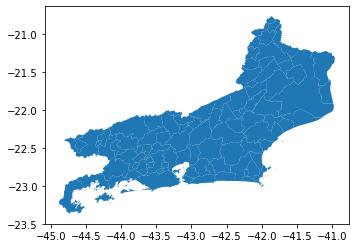

In [ ]:
municipos.plot()

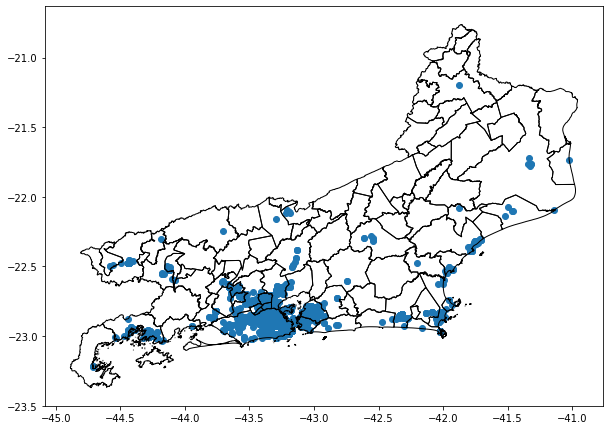

In [ ]:
#Como podemos fazer para visualizar os dados em apenas uma figura
fig, ax = plt.subplots(figsize=(10,10))

geo_ocorre.plot(ax=ax)
municipos.plot(ax=ax, facecolor = "None", edgecolor = "black")

In [ ]:
#Agora imagina que precisamos pegar apenas os dados do municpio de Nitetói, então temos que filtrar para esse municipio.

niteroi = municipos[municipos['MUNICIPIO'] == 'Niterói']

niteroi.to_file('/content/drive/MyDrive/Diego Faculdade/Estudos sobre DataSciense/shp/niteroi.shp')

niteroi_dis = gpd.read_file('/content/drive/MyDrive/Diego Faculdade/Estudos sobre DataSciense/shp/niteroi_dis.shp')

niteroi_dis

,MUNICIPIO,geometry
0,Niterói,"MULTIPOLYGON (((-43.08278 -22.98577, -43.08271..."


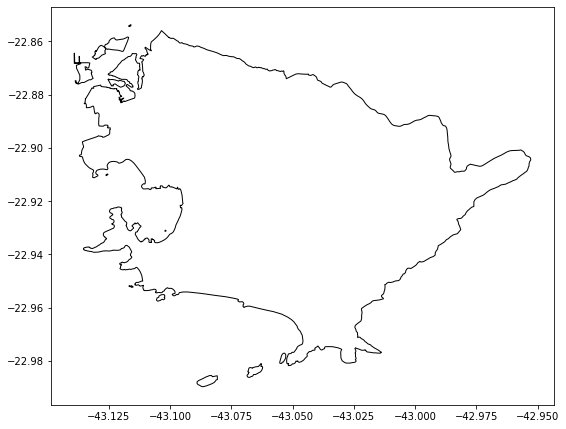

In [ ]:
niteroi.plot(figsize = (9, 8), facecolor = 'None', edgecolor = 'black')

plt.show()

In [ ]:
#Se eu quiser registrar agora somente os dados existentes em Niterói
poly_niteroi = niteroi_dis.iloc[0].geometry

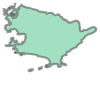

In [ ]:
poly_niteroi

In [ ]:
#agora podemos fazer uma operação de intercção entre os pontos e o poligono de Niterói

ocorr_niteroi = geo_ocorre[geo_ocorre.intersects(poly_niteroi)]

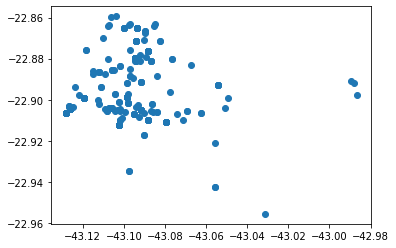

In [ ]:
ocorr_niteroi.plot()

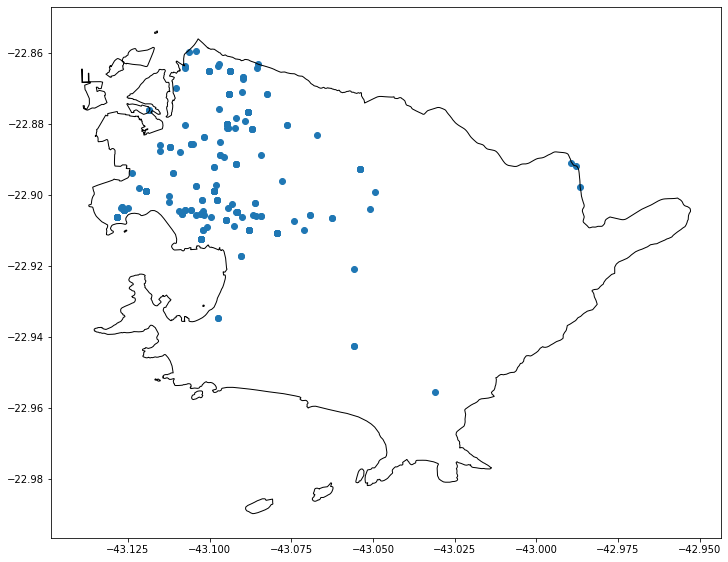

In [ ]:
#Realizar uma nova visualização de dados porém para o município de Niterói

fig, ax = plt.subplots(figsize=(12,12))

ocorr_niteroi.plot(ax=ax)
niteroi.plot(ax=ax, facecolor = 'None', edgecolor = 'black')

In [ ]:
#Já com os dados filtrados vamos agora salvar os dados em uma pasta no drive

geo_ocorre.to_file('/content/drive/MyDrive/Diego Faculdade/Estudos sobre DataSciense/shp/ocorrencias_ERJ.shp')

ocorr_niteroi.to_file('/content/drive/MyDrive/Diego Faculdade/Estudos sobre DataSciense/shp/ocorrencias_niteroi.shp')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """


<h1><strong>Resumo do que foi apresentado</strong></h1>

  - Baixar a analisar dados disponibilizados em um portal publico.
  - Criar um estrutura de dados GeoDataFrame.
  - Faltrar os dados contidos em uma geometria.

###### Proximo NoteBook será para visualizaçao e formação de mapas interativos